<a href="https://colab.research.google.com/github/Umadevi-RK/AIML_AS/blob/main/2313157_Umadevi_AS_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read data
data= pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [3]:
# To identify Null Values & it's count
data.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [5]:
# Define threshold for null values
threshold = 1

# Drop rows with null values exceeding the threshold
data = data[data.isnull().sum(axis=1) <= threshold]

data.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,445
Measles,0


In [6]:
print("Row & Column")
data.shape

Row & Column


(2306, 22)

In [7]:
# Replace null values in 'Hepatitis B' with 0
data['Hepatitis B'].fillna(0, inplace=True)

# Drop rows with null values in 'Population'
data.dropna(subset=['Population'], inplace=True)
data.dropna(subset=['GDP'], inplace=True)

data.isna().sum()

<ipython-input-7-c97e9a2421da>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Hepatitis B'].fillna(0, inplace=True)


,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [8]:
# Count Rows & Column
print("Row & Column")
data.shape

Row & Column


(2094, 22)

In [9]:
# Discriptive statistics
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2.094000e+03,2094.000000,2094.000000,2094.000000,2094.000000
mean,2007.018625,68.670439,169.446991,34.717287,4.750263,905.812222,62.382999,2643.559217,37.182856,48.291309,81.437918,6.014565,81.469436,2.163133,6737.616628,1.297307e+07,4.905444,4.965616,0.620632,11.949666
std,4.314349,9.897956,130.690053,135.434088,4.052393,2247.076607,39.584227,11841.275297,19.744411,184.385293,23.696434,2.364240,23.854748,5.869336,13817.626527,6.327112e+07,4.708973,4.807098,0.208585,3.283762
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,62.200000,71.000000,0.000000,1.000000,31.604560,9.000000,0.000000,18.500000,1.000000,76.000000,4.400000,77.000000,0.100000,418.760067,1.914238e+05,1.500000,1.500000,0.482250,10.000000
50%,2007.000000,71.400000,146.000000,3.000000,4.140000,128.085100,83.000000,17.500000,41.900000,4.000000,92.000000,5.890000,92.000000,0.100000,1467.173451,1.351370e+06,2.900000,3.100000,0.666000,12.100000
75%,2011.000000,75.400000,235.000000,22.000000,7.580000,563.982589,95.000000,453.000000,55.575000,30.000000,96.750000,7.677500,96.000000,1.200000,5145.055820,7.280902e+06,7.400000,7.475000,0.767000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.100000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.945000,20.700000


In [10]:
# descriptive Stat. including Categorical Variable
data.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2094,2094.000000,2094,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,...,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2.094000e+03,2094.000000,2094.000000,2094.000000,2094.000000
unique,141,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,1704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.018625,NaN,68.670439,169.446991,34.717287,4.750263,905.812222,62.382999,2643.559217,...,81.437918,6.014565,81.469436,2.163133,6737.616628,1.297307e+07,4.905444,4.965616,0.620632,11.949666
std,NaN,4.314349,NaN,9.897956,130.690053,135.434088,4.052393,2247.076607,39.584227,11841.275297,...,23.696434,2.364240,23.854748,5.869336,13817.626527,6.327112e+07,4.708973,4.807098,0.208585,3.283762
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2003.000000,NaN,62.200000,71.000000,0.000000,1.000000,31.604560,9.000000,0.000000,...,76.000000,4.400000,77.000000,0.100000,418.760067,1.914238e+05,1.500000,1.500000,0.482250,10.000000
50%,NaN,2007.000000,NaN,71.400000,146.000000,3.000000,4.140000,128.085100,83.000000,17.500000,...,92.000000,5.890000,92.000000,0.100000,1467.173451,1.351370e+06,2.900000,3.100000,0.666000,12.100000
75%,NaN,2011.000000,NaN,75.400000,235.000000,22.000000,7.580000,563.982589,95.000000,453.000000,...,96.750000,7.677500,96.000000,1.200000,5145.055820,7.280902e+06,7.400000,7.475000,0.767000,14.300000


In [11]:
# Datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2094 non-null   object 
 1   Year                             2094 non-null   int64  
 2   Status                           2094 non-null   object 
 3   Life expectancy                  2094 non-null   float64
 4   Adult Mortality                  2094 non-null   float64
 5   infant deaths                    2094 non-null   int64  
 6   Alcohol                          2094 non-null   float64
 7   percentage expenditure           2094 non-null   float64
 8   Hepatitis B                      2094 non-null   float64
 9   Measles                          2094 non-null   int64  
 10   BMI                             2094 non-null   float64
 11  under-five deaths                2094 non-null   int64  
 12  Polio                    

In [12]:
# Column Index
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
# Unquie value
data.nunique()

,0
Country,141
Year,16
Status,2
Life expectancy,356
Adult Mortality,411
infant deaths,188
Alcohol,958
percentage expenditure,2090
Hepatitis B,84
Measles,769


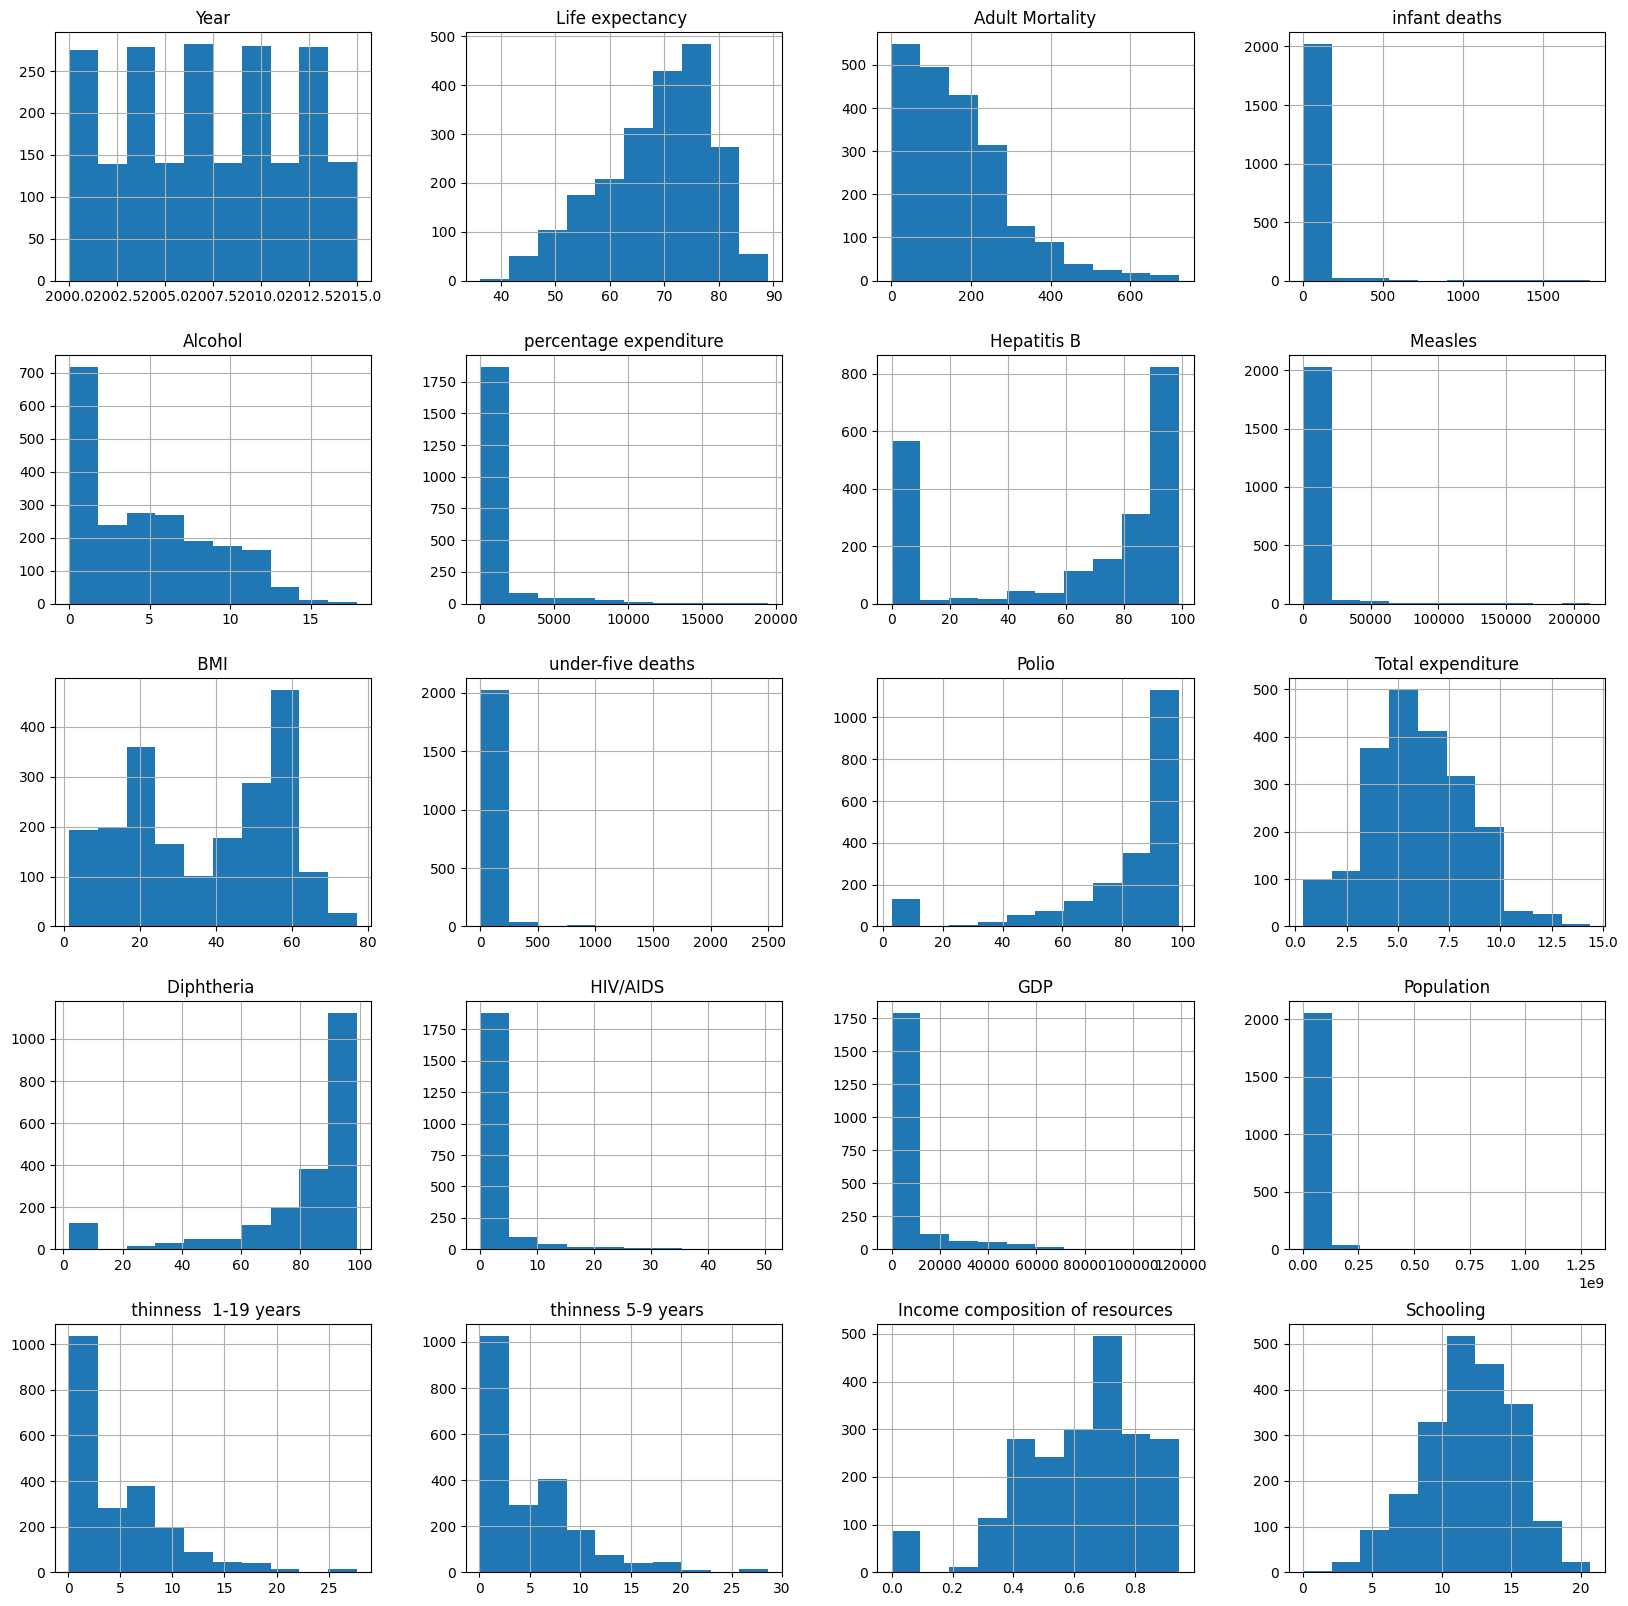

In [14]:
# Histogram
data.hist(figsize=(20,20))
plt.show()

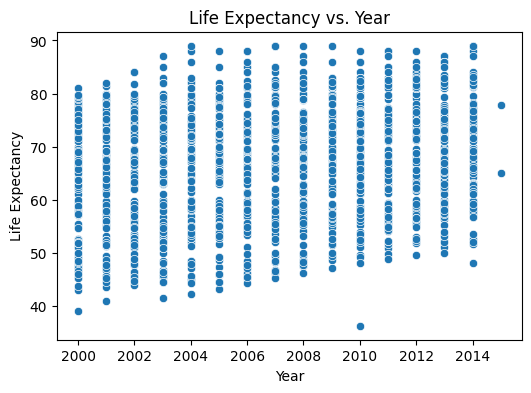

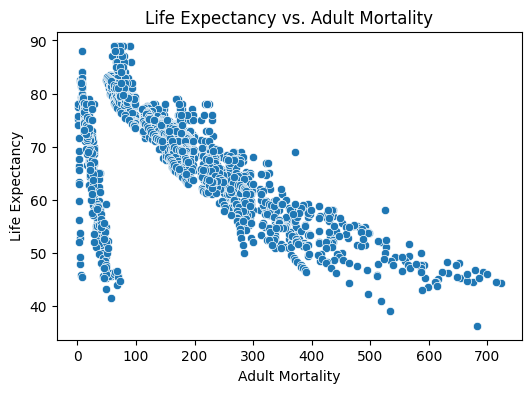

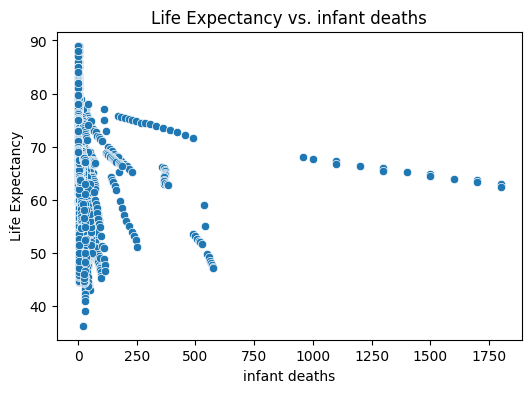

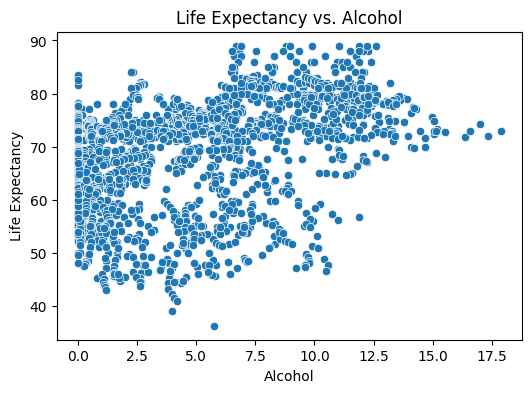

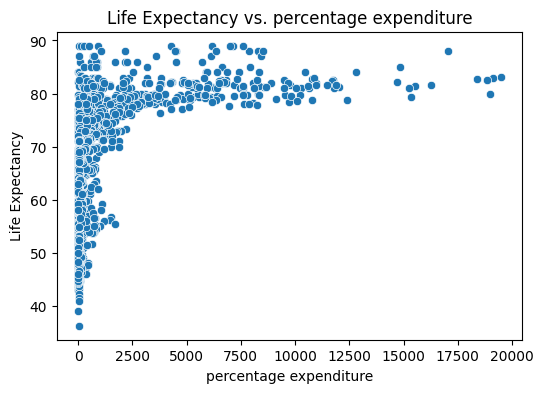

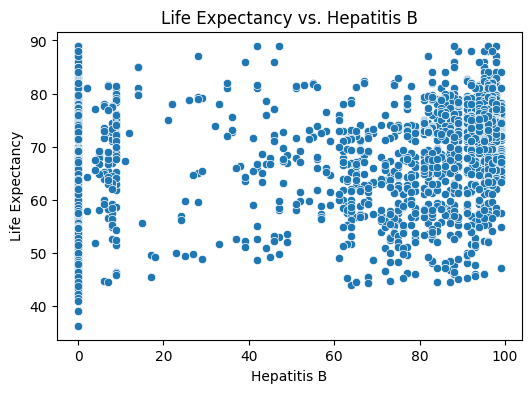

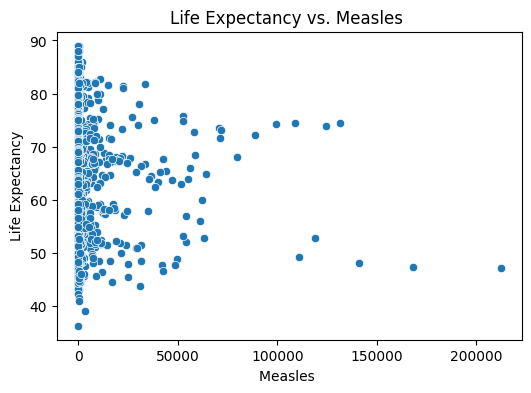

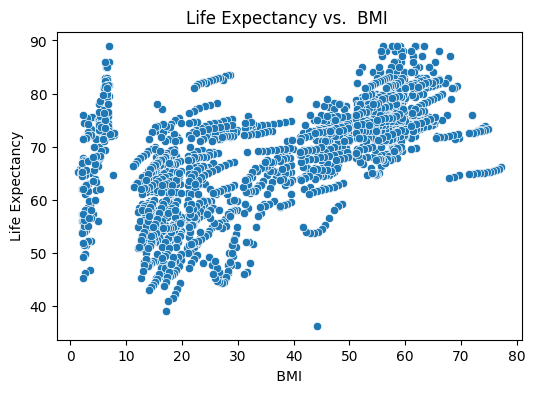

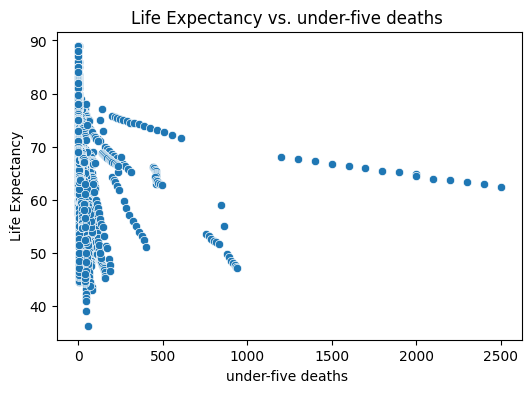

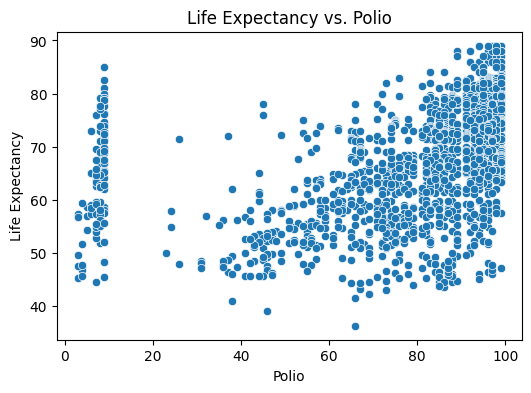

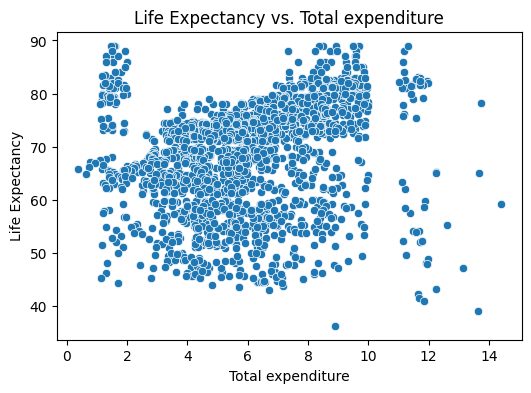

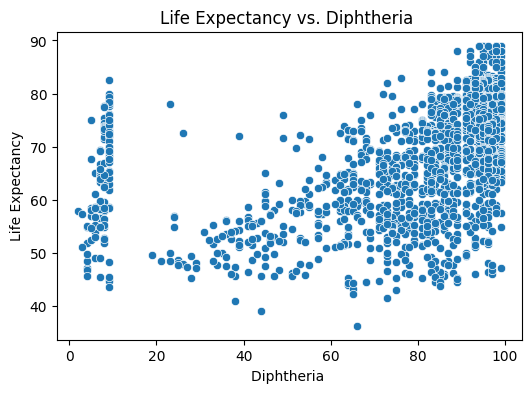

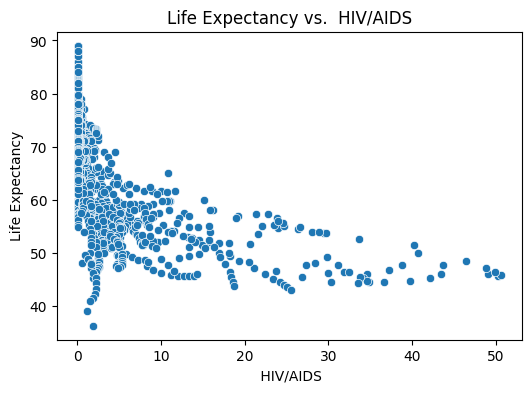

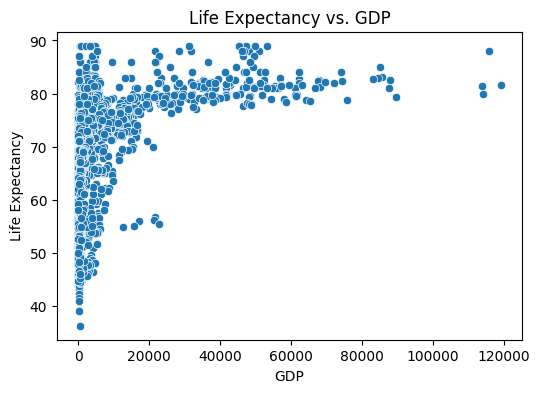

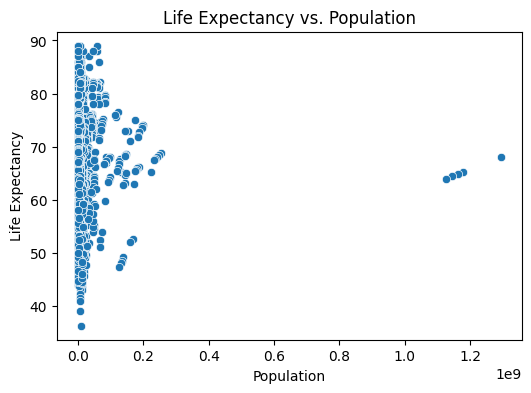

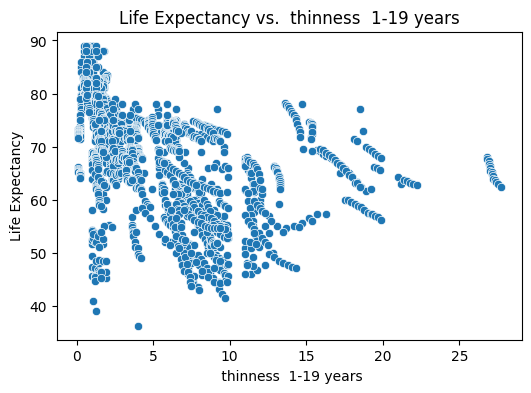

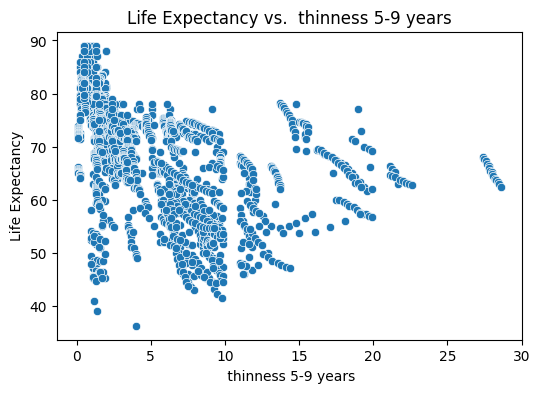

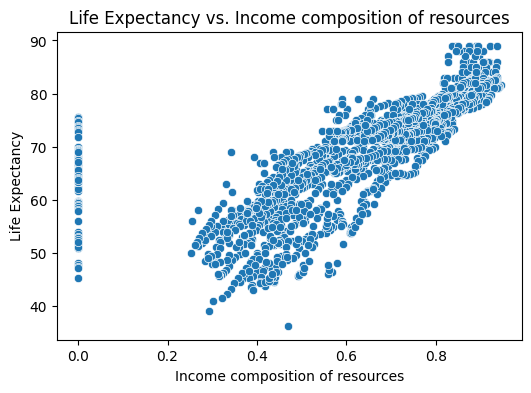

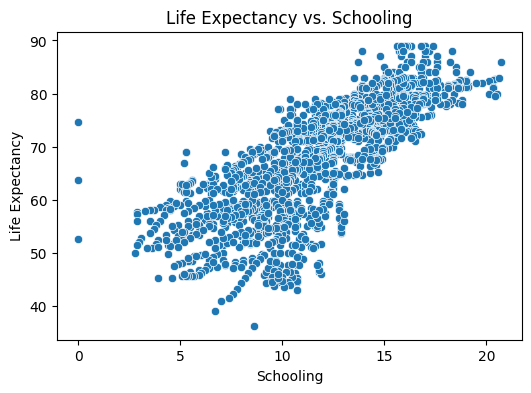

In [19]:
# Scatter Plot
# Selecting only numeric Variables
numeric_variables = data.select_dtypes(include=['number']).columns

# Dropping the target variable
numeric_variables = numeric_variables.drop('Life expectancy ')

# Scatter plots
import seaborn as sns
for feature in numeric_variables:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='Life expectancy ', data=data)
    plt.title(f'Life Expectancy vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Life Expectancy')
    plt.show()

In [20]:
# Selecting Numeric Variables for correlation
numeric_variables = data.select_dtypes(include=['number']).columns

# To calculate correlation matrix
correlation_matrix = data[numeric_variables].corr()

# Correlations with Life Expectancy
# Exclude self-correlation
life_expectancy_correlations = correlation_matrix['Life expectancy '].drop('Life expectancy ')

# Print correlation values
print("Correlation with Life Expectancy:")
print(life_expectancy_correlations)

Correlation with Life Expectancy:
Year                               0.167820
Adult Mortality                   -0.672632
infant deaths                     -0.171141
Alcohol                            0.431050
percentage expenditure             0.429388
Hepatitis B                        0.191155
Measles                           -0.140416
 BMI                               0.596580
under-five deaths                 -0.196780
Polio                              0.438061
Total expenditure                  0.231989
Diphtheria                         0.461570
 HIV/AIDS                         -0.573136
GDP                                0.466550
Population                        -0.022151
 thinness  1-19 years             -0.484583
 thinness 5-9 years               -0.477452
Income composition of resources    0.758949
Schooling                          0.779660
Name: Life expectancy , dtype: float64


In [21]:
# SLR :: Schooling_Life Expectancy
# Assigning DV & IV
X = data[['Schooling']]
y = data["Life expectancy "]

# Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

lr= LinearRegression()
lr.fit(X_train,y_train)

y_pred= lr.predict(X_test)

# R-Square [Strength of the model]
r2_score(y_test, y_pred)

0.6161032609076675

In [22]:
# Constant Coefficient
print(lr.intercept_)

lr.predict(X[0:1])

type(lr)

40.57832812528777


sklearn.linear_model._base.LinearRegression

In [23]:
# SLR :: Income Composition_Life Expectancy
# Assigning DV & IV
X = data[['Income composition of resources']]
y = data["Life expectancy "]

# Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

lr= LinearRegression()
lr.fit(X_train,y_train)

y_pred= lr.predict(X_test)

# R-Square [Strength of the model]
r2_score(y_test, y_pred)


0.509873487967976

In [24]:
# Constant Coefficient
print(lr.intercept_)

lr.predict(X[0:1])

45.65263799163842


array([63.35030054])

In [26]:
#MLR
mlr= LinearRegression()

# Training the model
mlr.fit(X_train,y_train)

# Testing the model
y_pred= mlr.predict(X_test)

In [27]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMultiple Linear Regression")
print(f" Mean Squared Error: {mse:.4f}")
print(f" R² Score: {r2:.4f}")


Multiple Linear Regression
 Mean Squared Error: 48.2199
 R² Score: 0.5099


In [30]:
# Intercept
print("Intercept:", mlr.intercept_)

mlr.predict(X[0:5])

Intercept: 45.65263799163842


array([63.35030054, 63.23945923, 63.01777661, 62.75914689, 62.42662296])

In [31]:
# To check the predicted values
prediction = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
prediction.head()

,Actual,Predicted
2312,39.0,56.441192
1786,65.2,64.273978
1145,73.2,67.710059
388,73.7,74.286643
29,73.3,70.407197


In [32]:
# To Save the model
import pickle
with open ('startup.pkl','wb') as f:
    pickle.dump(mlr,f)

# To load the trained model
with open('startup.pkl','rb') as f:
  pickle.load(f)